In [1]:

import numpy as np
import simpful as sf
from scipy.spatial import distance_matrix

from helpers import (calculate_lifetime, init_age, init_diversity, calculate_partner_age, init_fuzzy_system)
from conf.gendered_selection_config import Config
N_SAMPLES = 100

In [2]:
male_fitness = np.random.normal(size=N_SAMPLES, scale=3.0)
male_fitness[male_fitness <= 0] = 0
female_fitness = np.random.normal(size=N_SAMPLES)
male_age = np.random.randint(low=1, high=4, size=N_SAMPLES)
female_age = np.random.randint(low=1, high=4, size=N_SAMPLES)

male_lifetime = calculate_lifetime(L=Config.L, U = Config.U, fitness=male_fitness, age=male_age)
female_lifetime = calculate_lifetime(L=Config.L, U = Config.U, fitness=female_fitness, age=female_age)

In [3]:
diversity = male_age / male_lifetime
population_diversity = diversity.mean()

In [4]:
FS =  init_fuzzy_system()

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.9.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



In [5]:
female_preferred_age = np.array([calculate_partner_age(FS, age=male_lifetime[i], diversity=population_diversity) for i in range(N_SAMPLES)])

In [6]:
mate_selection = np.argmin(distance_matrix(female_preferred_age.reshape(-1, 1), female_lifetime.reshape(-1, 1)), axis=1)

In [7]:
mate_selection

array([64, 85, 64, 20, 85, 64, 20, 64, 64, 20, 20, 72, 64, 85, 64, 64, 64,
       64, 64, 64, 64, 64, 20, 64, 64, 85, 85, 64, 64, 64, 85, 85, 64, 64,
       85, 64, 85, 64, 64, 85, 64, 85, 64, 64, 64, 20, 64, 64, 20, 64, 64,
       20, 64, 64, 64, 85, 72, 20, 20, 20, 64, 64, 64, 64, 64, 64, 64, 64,
       64, 20, 20, 85, 85, 64, 64, 64, 85, 20, 64, 64, 85, 20, 64, 85, 64,
       64, 64, 20, 20, 64, 64, 85, 64, 64, 64, 64, 20, 20, 64, 64])

In [8]:
# While not condition (Number of iterations)
# Age = 0
# Generate random genomes & genders
# Calculate fitness
# Age += 1 - done

# Do recombination + mutation
# Calculate fitness
# if age > lifetime: remove



In [9]:
# Basic minimization function
def quadratic_fitness(vec):
    return -np.sum(np.square(vec))

In [10]:
def crossover(male_genome, female_genome):
    i = np.random.randint(low=1,high=male_genome.shape[0]-1)
    return np.concatenate([male_genome[:i], female_genome[i:]])
    

In [11]:
def mutate(genome, p_mutation: float=.2):
    if np.random.rand() < p_mutation:
        k = np.random.randint(low=0, high=genome.shape[0] - 1)
        genome[k] += np.random.normal(loc=0.0, scale=.2)
    return genome

In [12]:
N = 100
PERCENT_MALES_REPRODUCING: float = .35

# Init fuzzy system
FS =  init_fuzzy_system()

# Generate initial population
genomes = np.random.normal(loc=2, scale=3, size=(N, 5))
fitness = np.apply_along_axis(quadratic_fitness, 1, genomes)
gender = (np.random.rand(N) >= .5).astype(int)
age = np.zeros(N)
male_indices = np.argwhere(gender == 1).flatten()
female_indices = np.argwhere(gender == 0).flatten()
max_fitness_history = []
median_fitness_history = []



for epoch in range(100):
    age += 1
    
    male_indices = np.argwhere(gender == 1).flatten()
    female_indices = np.argwhere(gender == 0).flatten()
    
    to_select = np.round(male_indices.shape[0] * PERCENT_MALES_REPRODUCING).astype(int)
    random_males = np.random.choice(male_indices, size=to_select)
    
    lifetime = calculate_lifetime(L=Config.L, U = Config.U, fitness=fitness, age=age)
    
    diversity = age[male_indices] / lifetime[male_indices]
    population_diversity = diversity.mean()
    
    female_preferred_age = np.array([calculate_partner_age(FS, age=lifetime[i], diversity=population_diversity) for i in random_males])
    mate_selection = np.argmin(distance_matrix(female_preferred_age.reshape(-1, 1), lifetime[female_indices].reshape(-1, 1)), axis=1)
    
    # Generating children using crossover
    children = np.array([crossover(genomes[random_males[i]], genomes[mate_selection[i]]) for i in range(len(random_males))])
    
    # Adding children to the general population
    genomes = np.vstack([genomes, children])
    age = np.concatenate([age, np.zeros(to_select)])
    gender = np.concatenate([gender, (np.random.rand(children.shape[0]) >= .5).astype(int)])
    
    # Calculating fitness again
    genomes = np.apply_along_axis(mutate, 1, genomes)
    fitness = np.apply_along_axis(quadratic_fitness, 1, genomes)
    
    # Removing "old" genomes
    lifetime = calculate_lifetime(L=Config.L, U = Config.U, fitness=fitness, age=age)
    to_remove = lifetime >= 1.0
    genomes = genomes[~to_remove, :]
    gender =  gender[~to_remove]
    age =  age[~to_remove]
    fitness = fitness[~to_remove]
    
    max_fitness_history.append(np.max(fitness))
    median_fitness_history.append(np.median(fitness))

    print(f'Max fitness: {np.max(fitness)}')
    print(f'Median fitness: {np.median(fitness)}')
    print(f'Population size: {genomes.shape[0]}')
    

    
    

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.9.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)

Max fitness: -7.00090324738424
Median fitness: -47.754719999100374
Population size: 117
Max fitness: -2.903126839644455
Median fitness: -42.48961192038429
Population size: 136
Max fitness: -2.903126839644455
Median fitness: -43.78010492601183
Population size: 156
Max fitness: -2.9033991619759147
Median fitness: -41.042138465178816
Population size: 179
Max fitness: -2.9033991619759147
Median fitness: -41.042138465178816
Population size: 195
Max fitness: -3.922427798000251
Median fitness: -38.88714474448952
Population size: 198
Max fitness: -3.922427798000251
Median fitness: -36.64000883498436
Population size: 195
Max fitness: -3.972529615968463
Median fitness: -38.67611845090654
Population size: 204
Max fitness: -3.9725

[]

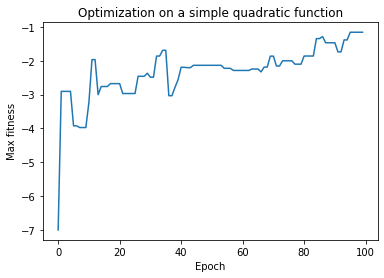

In [13]:
from matplotlib import pyplot as plt
plt.plot(max_fitness_history)
plt.xlabel('Epoch')
plt.ylabel('Max fitness')
plt.title('Optimization on a simple quadratic function')
plt.plot()

[]

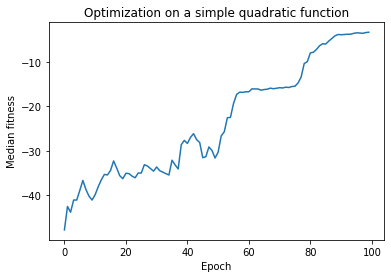

In [14]:
plt.plot(median_fitness_history)
plt.xlabel('Epoch')
plt.ylabel('Median fitness')
plt.title('Optimization on a simple quadratic function')
plt.plot()